0    314.062500
1    314.273438
2    313.144531
3    309.976074
4    310.381348
dtype: float64 0    314.058594
1    308.830078
2    305.021240
3    300.381104
4    300.069214
dtype: float64


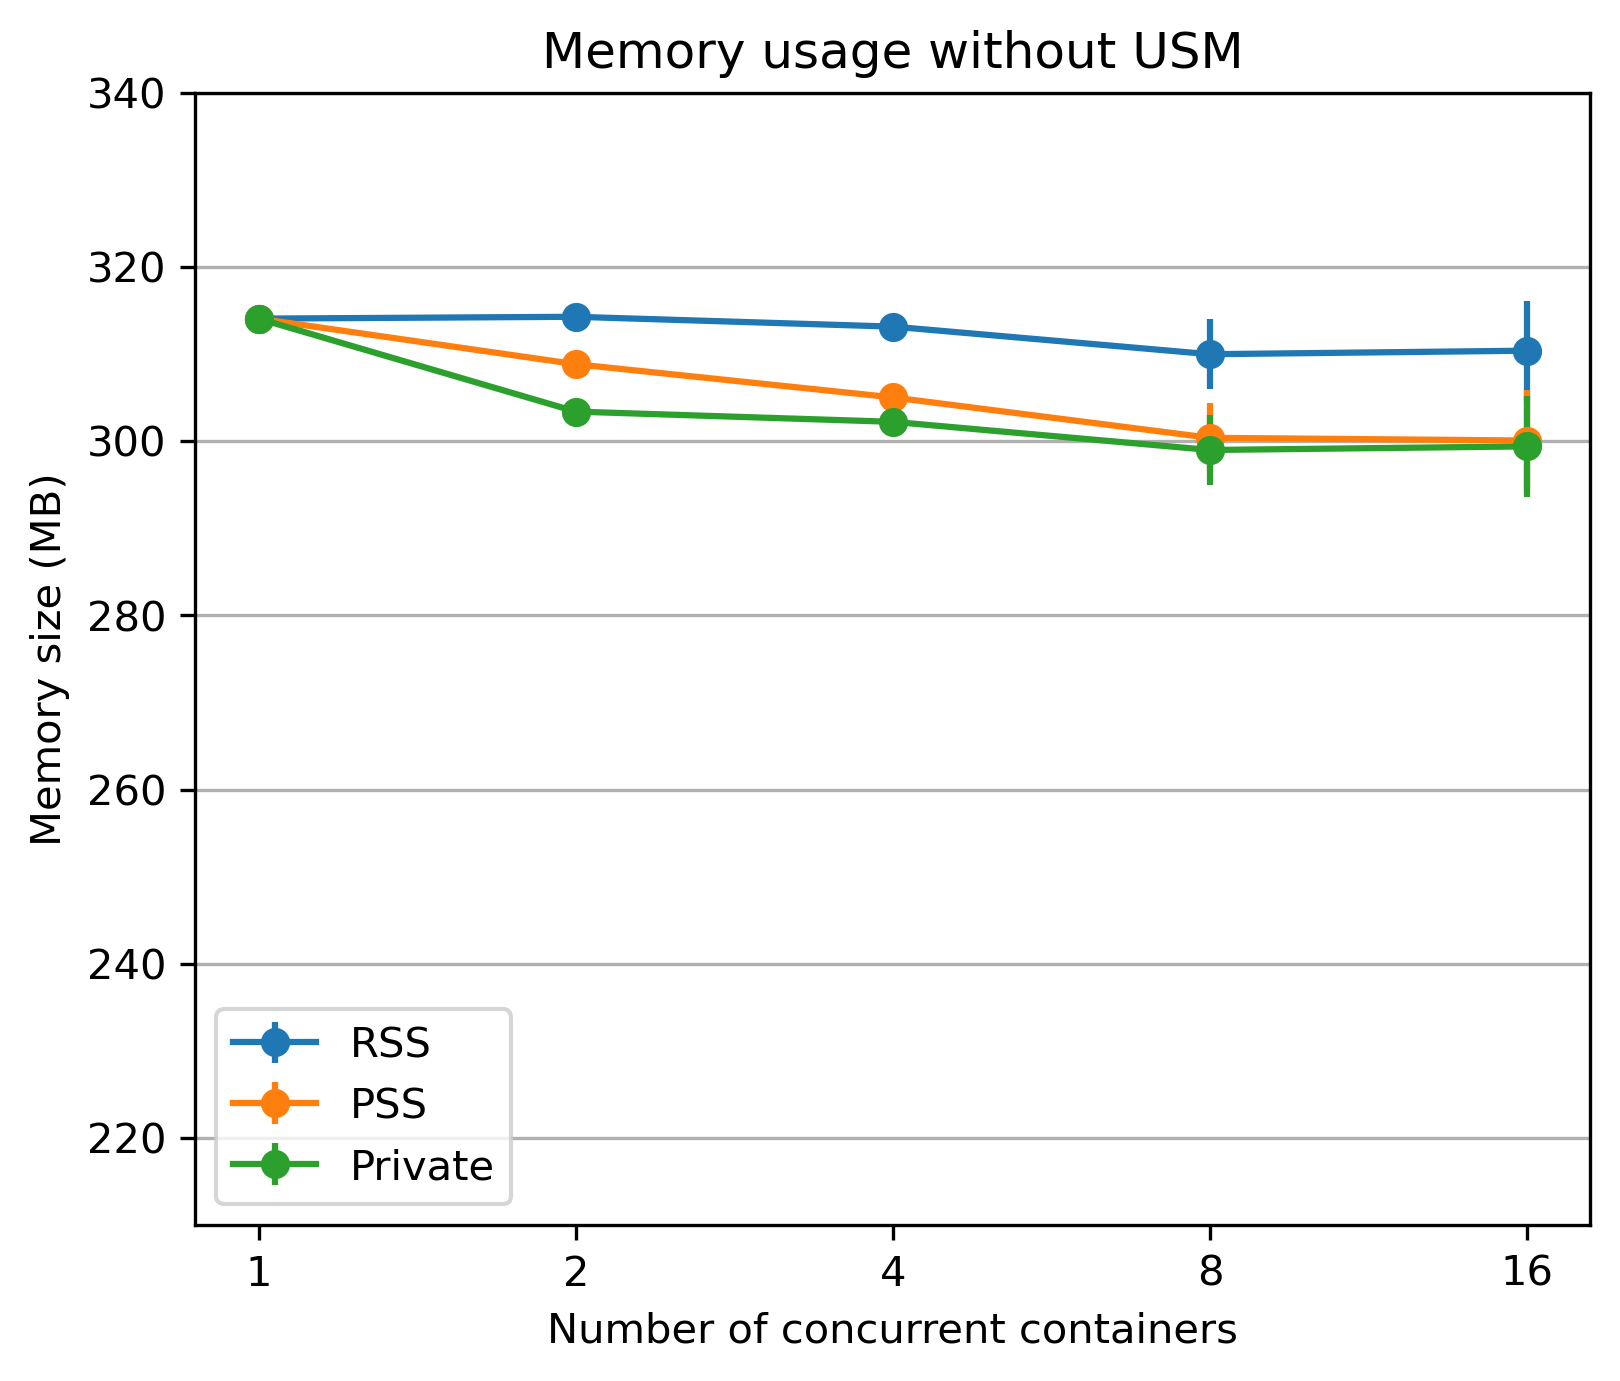

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import math

# benchmark = sys.argv[1]
# num = sys.argv[2]
# dedup = sys.argv[3]

usm_data_dir = r"C:\Users\facel\usm_plot_data_needed"

# machine = r"einstein_vm"
machine = r"cscs"
benchmark = "411.image-recognition"
num = 16
dedup = 0

data_dir = os.path.join(usm_data_dir, machine, "memory_usage", benchmark, "function_memory\dedup_off")


n = math.log(int(num),2)
n = int(n)
# x_axis = np.logspace(0,n,n+1,base=2)
x_axis = [1, 2, 4, 8, 16]

data = {}
data_rss_avg = []
data_rss_err = []
data_pss_avg = []
data_pss_err = []
data_private_avg = []
data_private_err = []

for i in x_axis:
    i = int(i)
    data[str(i)] = {}
    file_name = "pmap_result" + str(i) + ".csv"
    data[str(i)]["df"] = pd.read_csv(os.path.join(data_dir + "/", str(i) + "/", file_name))
    data[str(i)]["rss"] = data[str(i)]["df"]["rss"]
    data[str(i)]["pss"] = data[str(i)]["df"]["pss"]
    data[str(i)]["private_clean"] = data[str(i)]["df"]["private_clean"]
    data[str(i)]["private_dirty"] = data[str(i)]["df"]["private_dirty"]
    data[str(i)]["rss_avg"] = np.mean(data[str(i)]["rss"])
    data[str(i)]["rss_err"] = round(np.std(data[str(i)]["rss"]),1)
    data[str(i)]["pss_avg"] = np.mean(data[str(i)]["pss"])
    data[str(i)]["pss_err"] = round(np.std(data[str(i)]["pss"]),1)
    data[str(i)]["private_avg"] = np.mean(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"])
    data[str(i)]["private_err"] = round(np.std(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"]),1)

    data_rss_avg.append(data[str(i)]["rss_avg"])
    data_rss_err.append(data[str(i)]["rss_err"])
    data_pss_avg.append(data[str(i)]["pss_avg"])
    data_pss_err.append(data[str(i)]["pss_err"])
    data_private_avg.append(data[str(i)]["private_avg"])
    data_private_err.append(data[str(i)]["private_err"])
    # print (data[str(i)]["df"])
    # print (data[str(i)]["rss"])
    # print (data[str(i)]["rss_avg"])
    # print (data[str(i)]["rss_err"])
    # print (data[str(i)]["pss_avg"])
    # print (data[str(i)]["pss_err"])

data_rss_avg = pd.Series(data_rss_avg) / 1024
data_rss_err = pd.Series(data_rss_err) / 1024
data_pss_avg = pd.Series(data_pss_avg) / 1024
data_pss_err = pd.Series(data_pss_err) / 1024
data_private_avg = pd.Series(data_private_avg) / 1024
data_private_err = pd.Series(data_private_err) / 1024

print(data_rss_avg, data_pss_avg)

x = np.arange(1,n+2)
# print(x)

# plt.subplot(1,2,1)
# plt.rcParams['figure.dpi'] = 500
plt.rcParams["figure.figsize"] = (6,5)
plt.errorbar(x, data_rss_avg, yerr=data_rss_err,  fmt='o-', label="RSS")
plt.errorbar(x, data_pss_avg, yerr=data_pss_err,  fmt='o-', label="PSS")
plt.errorbar(x, data_private_avg, yerr=data_private_err,  fmt='o-', label="Private")
# plt.title('Concurrent containers running ' + benchmark)
plt.title("Memory usage without USM")
plt.xlabel('Number of concurrent containers')
plt.ylabel('Memory size (MB)')
plt.ylim(ymin=210, ymax=340)
plt.xticks(x, x_axis)
plt.legend(loc="lower left")
plt.grid(axis='y')


#     plt.savefig(os.path.join(data_dir + "/", "concurrent_dedup.jpg"))





0    314.398438
1    318.382812
2    315.758789
3    317.241699
4    318.950439
dtype: float64 0    314.394531
1    272.865234
2    246.741943
3    236.084351
4    230.724854
dtype: float64
dedup: 1


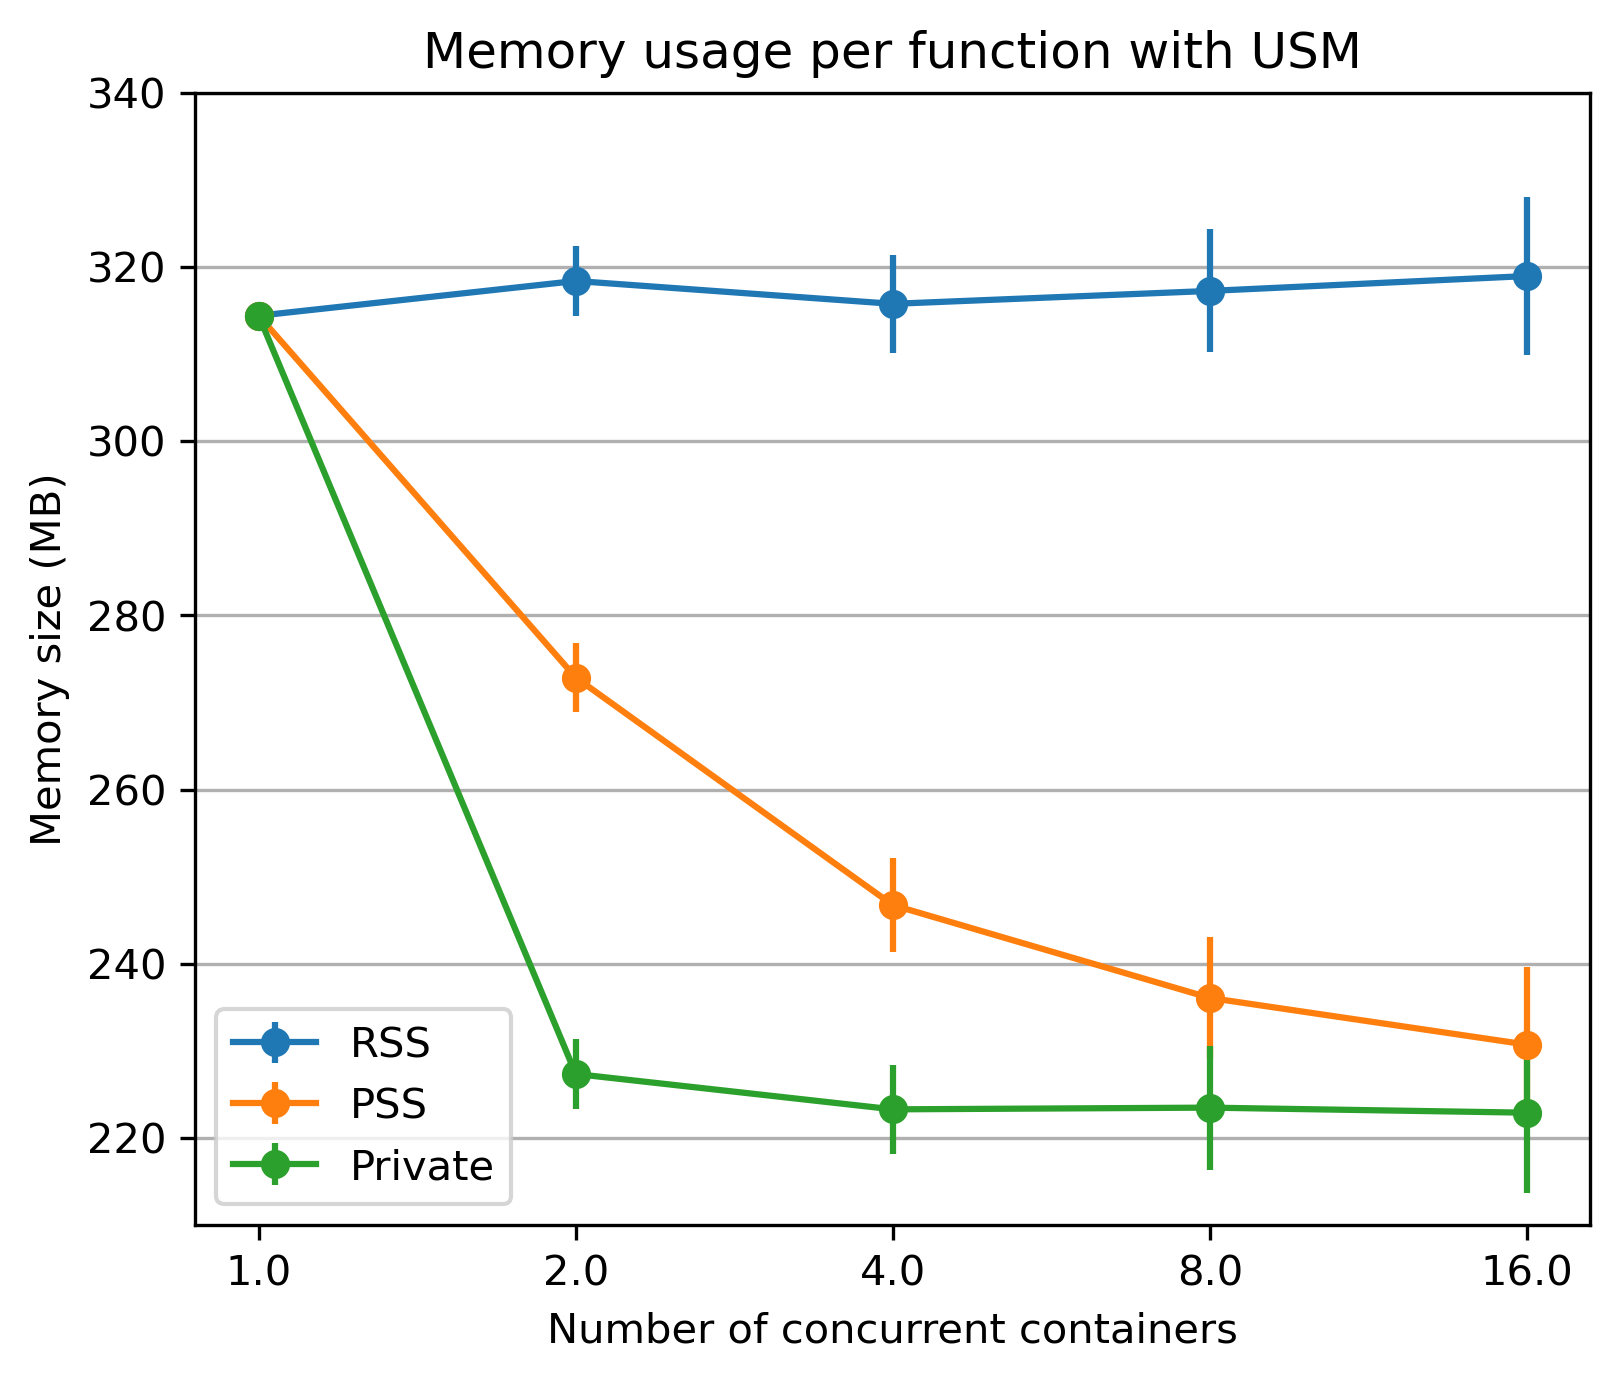

In [14]:
dedup = 1
data_dir = os.path.join(usm_data_dir, machine, "memory_usage", benchmark, "function_memory\dedup_on")
n = math.log(int(num),2)
n = int(n)
x_axis = np.logspace(0,n,n+1,base=2)
data = {}
data_rss_avg = []
data_rss_err = []
data_pss_avg = []
data_pss_err = []
data_private_avg = []
data_private_err = []

for i in x_axis:
    i = int(i)
    data[str(i)] = {}
    file_name = "pmap_result" + str(i) + ".csv"
    data[str(i)]["df"] = pd.read_csv(os.path.join(data_dir + "/", str(i) + "/", file_name))
    data[str(i)]["rss"] = data[str(i)]["df"]["rss"]
    data[str(i)]["pss"] = data[str(i)]["df"]["pss"]
    data[str(i)]["private_clean"] = data[str(i)]["df"]["private_clean"]
    data[str(i)]["private_dirty"] = data[str(i)]["df"]["private_dirty"]
    data[str(i)]["rss_avg"] = np.mean(data[str(i)]["rss"])
    data[str(i)]["rss_err"] = round(np.std(data[str(i)]["rss"]),1)
    data[str(i)]["pss_avg"] = np.mean(data[str(i)]["pss"])
    data[str(i)]["pss_err"] = round(np.std(data[str(i)]["pss"]),1)
    data[str(i)]["private_avg"] = np.mean(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"])
    data[str(i)]["private_err"] = round(np.std(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"]),1)

    data_rss_avg.append(data[str(i)]["rss_avg"])
    data_rss_err.append(data[str(i)]["rss_err"])
    data_pss_avg.append(data[str(i)]["pss_avg"])
    data_pss_err.append(data[str(i)]["pss_err"])
    data_private_avg.append(data[str(i)]["private_avg"])
    data_private_err.append(data[str(i)]["private_err"])
    # print (data[str(i)]["df"])
    # print (data[str(i)]["rss"])
    # print (data[str(i)]["rss_avg"])
    # print (data[str(i)]["rss_err"])
    # print (data[str(i)]["pss_avg"])
    # print (data[str(i)]["pss_err"])

data_rss_avg = pd.Series(data_rss_avg) / 1024
data_rss_err = pd.Series(data_rss_err) / 1024
data_pss_avg = pd.Series(data_pss_avg) / 1024
data_pss_err = pd.Series(data_pss_err) / 1024
data_private_avg = pd.Series(data_private_avg) / 1024
data_private_err = pd.Series(data_private_err) / 1024

print(data_rss_avg, data_pss_avg)

x = np.arange(1,n+2)

# plt.subplot(1,2,2)
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,5)
plt.errorbar(x, data_rss_avg, yerr=data_rss_err,  fmt='o-', label="RSS")
plt.errorbar(x, data_pss_avg, yerr=data_pss_err,  fmt='o-', label="PSS")
plt.errorbar(x, data_private_avg, yerr=data_private_err,  fmt='o-', label="Private")
# plt.title('Concurrent containers running ' + benchmark)
plt.title("Memory usage per function with USM")
plt.xlabel('Number of concurrent containers')
plt.ylabel('Memory size (MB)')
plt.ylim(ymin=210, ymax=340)
plt.xticks(x, x_axis)
# plt.legend(loc="lower left")
plt.legend()
plt.grid(axis='y')
print("dedup:", dedup)

# plt.savefig(os.path.join(data_dir + "/", "two_together_concurrent.jpg"))

In [16]:
# without usm: pss 300.069214
# 230.724854




